In [1]:
# Paso 0: Importar librerias necesarias

import warnings
warnings.simplefilter('ignore')

import pandas as pd
import numpy as np
import pylab as plt
from pandas.plotting import lag_plot


In [2]:
# Paso 1: Importar el DF de todas las empresas del IBEX 35

df = pd.read_csv('ibex35.csv')

df.head()

,id,ticker,empresa,date,open,high,low,close,adj close,volume
0,1,ANA,Acciona,2019-01-02,73.900002,73.900002,73.900002,73.900002,64.148270,0
1,1,ANA,Acciona,2022-06-24,174.199997,178.800003,174.000000,178.800003,169.562302,0
2,1,ANA,Acciona,2022-06-23,169.899994,173.199997,169.000000,173.000000,164.061951,0
3,1,ANA,Acciona,2022-06-22,171.399994,171.399994,168.800003,170.199997,161.406616,0
4,1,ANA,Acciona,2022-06-21,179.699997,179.699997,172.300003,173.600006,164.630966,0


In [3]:
# Paso 2: Filtrar por la empresa sobre la que realizar el modelo

sacyr = df[df['empresa'] == 'Sacyr']

sacyr.shape

(1325, 10)

In [4]:
# Paso 3: Seleccionar las columnas definitivas que utilizaremos

sacyr = sacyr [['date','open','high','low','close','adj close']]

sacyr.shape

(1325, 6)

In [5]:
# Paso 4: Modificar el formato de columna 'date' (format: object ===> datatime)

sacyr['date'] = pd.to_datetime(sacyr['date'], format="%Y-%m-%d")

sacyr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1325 entries, 38705 to 40029
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       1325 non-null   datetime64[ns]
 1   open       1325 non-null   float64       
 2   high       1325 non-null   float64       
 3   low        1325 non-null   float64       
 4   close      1325 non-null   float64       
 5   adj close  1325 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 72.5 KB


In [6]:
# Paso 5: Ordenar el DF por fecha

sacyr.sort_values(by='date',ascending= True, inplace=True)

sacyr.head()

,date,open,high,low,close,adj close
39590,2019-01-02,1.702205,1.739230,1.646666,1.729487,1.350952
39589,2019-01-03,1.704153,1.797205,1.704153,1.772846,1.384820
39588,2019-01-04,1.791846,1.861025,1.791846,1.838128,1.435814
39587,2019-01-07,1.867358,1.878076,1.834717,1.847871,1.443425
39586,2019-01-08,1.841538,1.875641,1.840564,1.856641,1.450275


In [7]:
# Paso 6: Filtrar nuevamente para eliminar efecto COVID del análisis (previo a 2021)

# Filtro:

fecha_inicio = '2021-01-01'
fecha_fin = '2024-03-01'

sacyr = sacyr[(sacyr['date'] >= fecha_inicio) & (sacyr['date'] <= fecha_fin)]

# Comprobar si se ha aplicado correctamente

sacyr.shape

(812, 6)

In [8]:
# Paso 7: Añadir al DF fechas obviadas por mercado de valores español (fin de semana y festivos)

# Rango de fechas desde '2021-01-01' a '2024-03-01'

date_range = pd.date_range(start=sacyr['date'].min(), end=sacyr['date'].max(), freq='D')

# Reindexa el DF con el nuevo rango de fechas

sacyr = sacyr.set_index('date').reindex(date_range).reset_index()

# Volver a modificar el nombre de columna 'date'

sacyr = sacyr.rename(columns={'index': 'date'})


In [9]:
# Paso 8: Comprobar que ha introducido la fechas ausentes en el DF original

sacyr.head(10)

,date,open,high,low,close,adj close
0,2021-01-04,2.009128,2.014974,1.937025,1.938974,1.653385
1,2021-01-05,1.929230,1.948717,1.899999,1.939948,1.654215
2,2021-01-06,1.975999,2.011076,1.962358,2.011076,1.714867
3,2021-01-07,1.997435,2.020820,1.977948,1.995487,1.701574
4,2021-01-08,2.009128,2.009128,1.972102,1.977948,1.686618
5,2021-01-09,NaN,NaN,NaN,NaN,NaN
6,2021-01-10,NaN,NaN,NaN,NaN,NaN
7,2021-01-11,1.974051,1.981846,1.954564,1.956512,1.668340
8,2021-01-12,1.970153,2.022769,1.954564,2.020820,1.723176
9,2021-01-13,2.022769,2.024717,1.995487,2.007179,1.711544


In [10]:
# Paso 9: Rellenar valores nulos con el anterior valor de la columna(viernes o previo a festivo)

sacyr = sacyr.fillna(method='ffill')

In [11]:
# Paso 10: Comprobar que se han introducido los valores correctamente


sacyr.head(10)

,date,open,high,low,close,adj close
0,2021-01-04,2.009128,2.014974,1.937025,1.938974,1.653385
1,2021-01-05,1.929230,1.948717,1.899999,1.939948,1.654215
2,2021-01-06,1.975999,2.011076,1.962358,2.011076,1.714867
3,2021-01-07,1.997435,2.020820,1.977948,1.995487,1.701574
4,2021-01-08,2.009128,2.009128,1.972102,1.977948,1.686618
5,2021-01-09,2.009128,2.009128,1.972102,1.977948,1.686618
6,2021-01-10,2.009128,2.009128,1.972102,1.977948,1.686618
7,2021-01-11,1.974051,1.981846,1.954564,1.956512,1.668340
8,2021-01-12,1.970153,2.022769,1.954564,2.020820,1.723176
9,2021-01-13,2.022769,2.024717,1.995487,2.007179,1.711544


In [12]:
# Paso 11: Establecer columna 'date' como índice para modelo

sacyr = sacyr.set_index('date')

sacyr.head(10)

,open,high,low,close,adj close
date,,,,,
2021-01-04,2.009128,2.014974,1.937025,1.938974,1.653385
2021-01-05,1.929230,1.948717,1.899999,1.939948,1.654215
2021-01-06,1.975999,2.011076,1.962358,2.011076,1.714867
2021-01-07,1.997435,2.020820,1.977948,1.995487,1.701574
2021-01-08,2.009128,2.009128,1.972102,1.977948,1.686618
2021-01-09,2.009128,2.009128,1.972102,1.977948,1.686618
2021-01-10,2.009128,2.009128,1.972102,1.977948,1.686618
2021-01-11,1.974051,1.981846,1.954564,1.956512,1.668340
2021-01-12,1.970153,2.022769,1.954564,2.020820,1.723176


In [13]:
# Paso 12: Establecer siguiente criterio para que el modelo AR funcione

sacyr.index = pd.DatetimeIndex(sacyr.index).to_period('d')

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

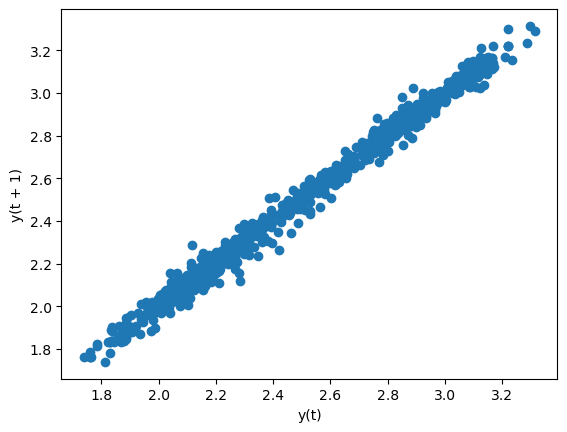

In [14]:
# Paso 13: Comprobar linealidad de la variable y = 'close'

lag_plot(sacyr.close)

In [15]:
# Paso 14: Importar modelo de AR

from statsmodels.tsa.ar_model import AutoReg as AR

In [16]:
# Paso 15: Realizar el split en el DF del train y el test

train, test = sacyr.close[:-10], sacyr.close[-10:]

train.shape, test.shape

((1143,), (10,))

In [17]:
# Paso 16: Entrenar el modelo de AR

modelo = AR(train, lags=1).fit()

In [18]:
# Paso 17: Realizar predicción con el entrenamiento

pred = modelo.predict(len(train), len(sacyr.close)-1)

# Check sobre los valores de la predicción

pred

2024-02-21    3.065120
2024-02-22    3.064243
2024-02-23    3.063369
2024-02-24    3.062497
2024-02-25    3.061628
2024-02-26    3.060762
2024-02-27    3.059898
2024-02-28    3.059037
2024-02-29    3.058178
2024-03-01    3.057322
Freq: D, dtype: float64

In [19]:
# Paso 18: Chequear coincidencia entre test y pred

test

date
2024-02-21    3.092
2024-02-22    3.084
2024-02-23    3.054
2024-02-24    3.054
2024-02-25    3.054
2024-02-26    3.056
2024-02-27    3.084
2024-02-28    3.026
2024-02-29    3.032
2024-03-01    3.054
Freq: D, Name: close, dtype: float64

In [20]:
# Paso 19: Calcular el error de la predicción sobre la realidad

error = (pred - test).abs().sum()/len(pred)  

error

0.016353133041125734

In [21]:
# Paso 20: Generar un DF sobre la comparativa en realidad, predicción y error

res=pd.DataFrame({'real': test, 'pred': pred, 'error': pred - test})

res

,real,pred,error
2024-02-21,3.092,3.065120,-0.026880
2024-02-22,3.084,3.064243,-0.019757
2024-02-23,3.054,3.063369,0.009369
2024-02-24,3.054,3.062497,0.008497
2024-02-25,3.054,3.061628,0.007628
2024-02-26,3.056,3.060762,0.004762
2024-02-27,3.084,3.059898,-0.024102
2024-02-28,3.026,3.059037,0.033037
2024-02-29,3.032,3.058178,0.026178
2024-03-01,3.054,3.057322,0.003322
